1.What is Boosting in Machine Learning.

=>Boosting is an ensemble technique in machine learning that combines multiple weak learners to form a strong learner. The idea is to sequentially train models each trying to correct the errors made by the previous one.



2.  How does Boosting differ from Bagging.

=>bagging:
.reduce variance and avoid overfitting

.train multiple models independently and in parallel

.classification-> majority vote

.Regression-> Average of predictions

boosting:
.reduce variance and combine weak learners to make model strong

.models are trained sequentially each one learning from the mistakes of the previous

3. What is the key idea behind AdaBoost.

=>The core idea of AdaBoost is to combine multiple weak learners usually decision stumps or shallow decision trees into a single strong learner by focusing on the mistakes made in previous iterations.

4. Explain the working of AdaBoost with an example

=>1.Initialize all training samples with equal weights.

2.Train the first weak learner.

3.After training:
.Increase the weights of misclassified points.

.Decrease the weights of correctly classified ones.

4.Train the next learner on the updated weighted data.

5.Repeat the process for a fixed number of iterations or until error is minimized.

6.Combine all weak learners using a weighted vote, where better models get higher weights.



5. What is Gradient Boosting, and how is it different from AdaBoost.

=>Gradient Boosting is an ensemble technique that builds a strong predictive model by combining several weak learners, usually decision trees.
It works by sequentially adding models that correct the residual errors the difference between actual and predicted values of previous models, using the gradient of a loss function.

6. What is the loss function in Gradient Boosting.

=>A loss function measures how far off the model's predictions are from the actual values. Gradient Boosting minimizes this loss function by adding new models that predict the negative gradient

7.  How does XGBoost improve over traditional Gradient Boosting.

=>Regularization: Adds L1 and L2 penalties to reduce overfitting not present in traditional gradient boosting

Parallel processing: XGBoost builds trees in parallel using optimized algorithms like histogrambased splitting traditional GBM is sequential and slower.

handling missing data:XGBoost automatically learns the best direction to go for missing values without needing imputation.



8.  What is the difference between XGBoost and CatBoost.

=>XGBoost:
Optimizes gradient boosting using efficient gradient descent with additional regularization to prevent overfitting.

Grows level-wise decision trees (can be asymmetric), which may lead to overfitting if not controlled.

Uses L1 and L2 regularization to control complexity and avoid overfitting.

Requires manual encoding (e.g., label encoding or one-hot encoding) of categorical features.


CatBoost:
Improves gradient boosting specifically for categorical data using ordered boosting and oblivious trees.

Uses oblivious (symmetric) trees, where all nodes at the same level use the same split. This results in faster and more regular tree structures.

Controls overfitting through ordered boosting and Bayesian averaging of categorical stats.


Automatically handles categorical features using techniques like target statistics with built-in overfitting prevention.





9. What are some real-world applications of Boosting techniques

=> 1. Credit Scoring and default Assessment.

2.fraud detection

3.medical diagnosis

4.customer churn prediction

5.stock market and financial forecasting


10. How does regularization help in XGBoost.

=>Regularization is a technique used to prevent overfitting by adding a penalty to the model's complexity in the objective function.

11. What are some hyperparameters to tune in Gradient Boosting models.

=>n_estimators: number of trees

learning_rate: step size/shrinkage

max_depth: max depth of each tree

max_features: max features used per split



12. What is the concept of Feature Importance in Boosting

=>Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting the target in a trained model.

In Boosting models (like XGBoost, CatBoost, GradientBoosting), this tells you which features contribute most to the prediction.



13. Why is CatBoost efficient for categorical data.

=>1. no manual encoding

2.ordered boosting

3. handles high cardinality

4. built in feature combination

In [ ]:
#14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y =make_classification(n_features=5,n_samples=100,n_classes=2,random_state=2,n_informative=3,n_redundant=0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

model=AdaBoostClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


0.8


In [ ]:
#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X,y =make_regression(n_features=5,n_samples=100,random_state=2,noise=10)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

model=AdaBoostRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
print(mae)


34.92534669468835


In [ ]:
#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X,y =load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

model=GradientBoostingClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")


feature_importance = pd.Series(model.feature_importances_, index=feature_names)
print("\nFeature Importance:")
print(feature_importance.sort_values(ascending=False))

Accuracy: 0.9298245614035088

Feature Importance:
worst perimeter            0.536106
worst radius               0.112737
worst area                 0.110903
worst concave points       0.081292
worst texture              0.072871
mean concave points        0.046495
texture error              0.009778
mean texture               0.008183
area error                 0.007281
worst smoothness           0.003857
worst concavity            0.003670
concavity error            0.000932
radius error               0.000877
concave points error       0.000777
worst compactness          0.000713
worst symmetry             0.000645
mean concavity             0.000437
mean perimeter             0.000423
mean radius                0.000399
mean smoothness            0.000335
mean area                  0.000243
mean symmetry              0.000219
fractal dimension error    0.000200
smoothness error           0.000153
compactness error          0.000144
mean compactness           0.000137
perimeter erro

In [ ]:
# Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X,y =make_regression(n_features=5,n_samples=100,random_state=2,noise=10)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

model=GradientBoostingRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

r2=r2_score(y_test,y_pred)
print(r2)

0.8687733070806578


In [ ]:
#18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

print(f"\nXGBoost is {'more' if xgb_accuracy > gb_accuracy else 'less' if xgb_accuracy < gb_accuracy else 'equally'} accurate than Gradient Boosting.")

Gradient Boosting Accuracy: 0.9298245614035088


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:24:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9385964912280702

XGBoost is more accurate than Gradient Boosting.


In [ ]:
#19. Train a CatBoost Classifier and evaluate using F1-Score

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


catboost_model = CatBoostClassifier(verbose=False, random_state=2)
catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1}")

CatBoost Classifier F1-Score: 0.9565217391304348


In [ ]:
#20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X, y = make_regression(n_features=5, n_samples=100, random_state=2, noise=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

xgb_regressor_model = XGBRegressor(random_state=2)
xgb_regressor_model.fit(X_train, y_train)

y_pred = xgb_regressor_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse}")

XGBoost Regressor Mean Squared Error (MSE): 2725.530778362187


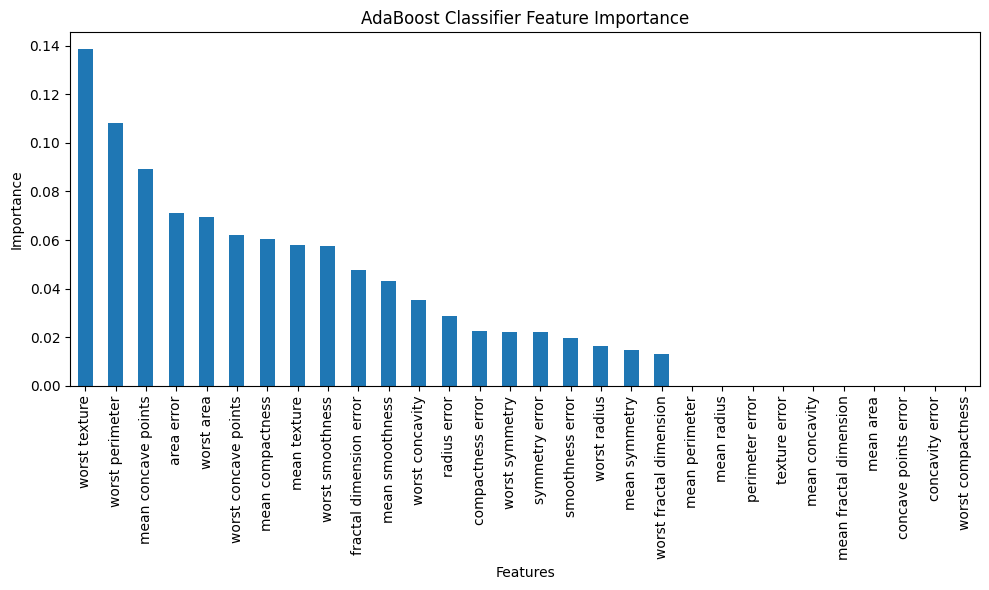

In [ ]:
#21. Train an AdaBoost Classifier and visualize feature importance

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


adaboost_model = AdaBoostClassifier(random_state=2)
adaboost_model.fit(X_train, y_train)

feature_importance = pd.Series(adaboost_model.feature_importances_, index=feature_names)

feature_importance = feature_importance.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("AdaBoost Classifier Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

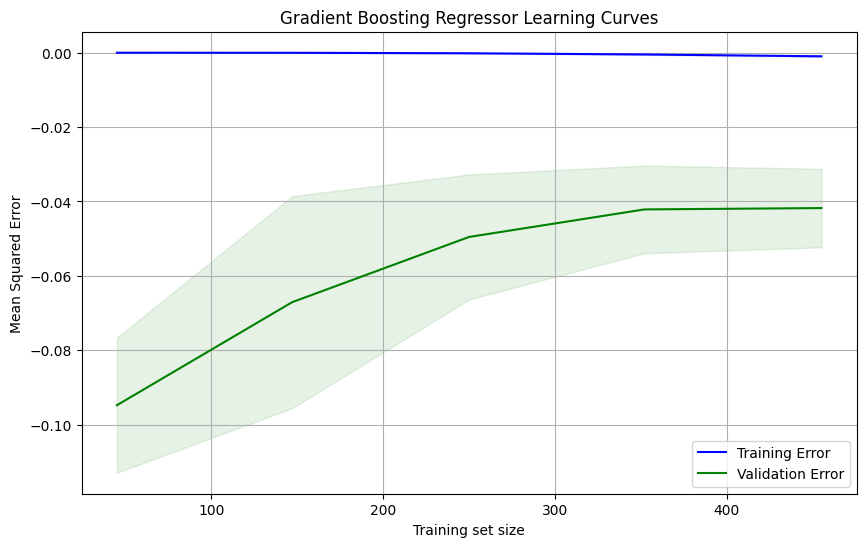

In [ ]:
#22. Train a Gradient Boosting Regressor and plot learning curves

from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt


X, y = load_breast_cancer(return_X_y=True)

gb_regressor_model = GradientBoostingRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    gb_regressor_model,
    X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=2),

    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=2,
)

train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Error",color="blue")
plt.plot(train_sizes, test_mean, label="Validation Error",color="green")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1 ,color="green")
plt.title("Gradient Boosting Regressor Learning Curves")

plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.show()





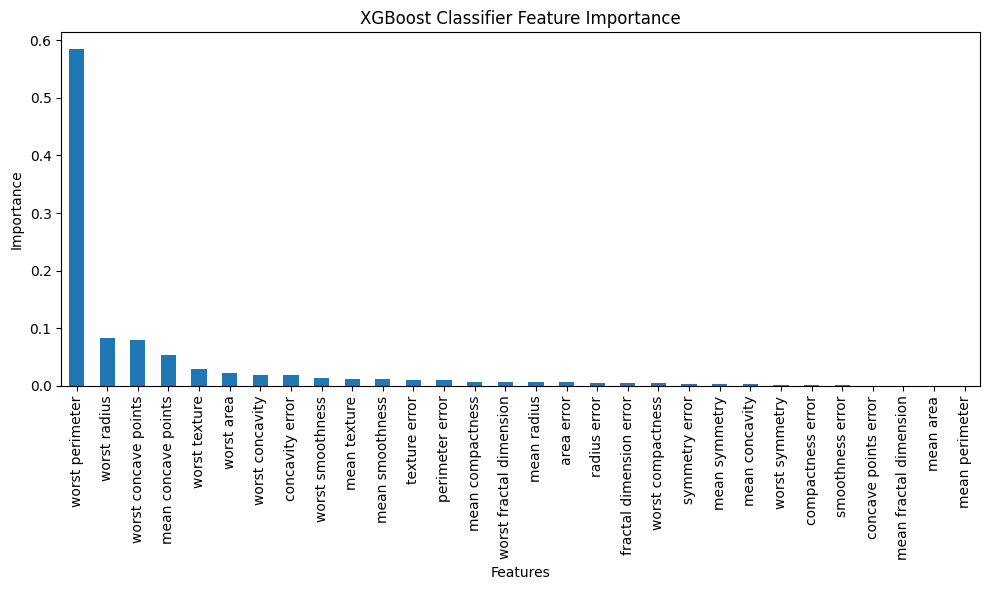

In [ ]:
#23. Train an XGBoost Classifier and visualize feature importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

feature_importance = pd.Series(xgb_model.feature_importances_, index=feature_names)

feature_importance = feature_importance.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("XGBoost Classifier Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

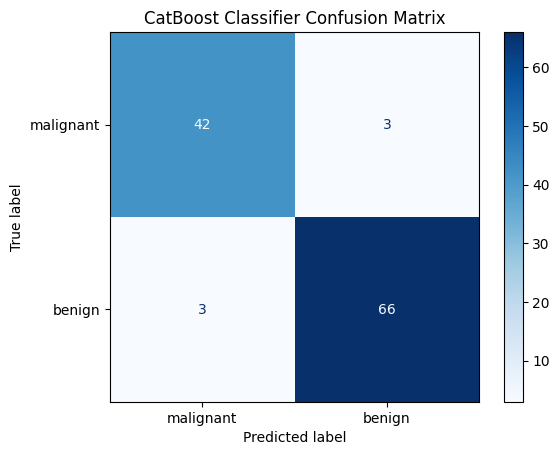

In [ ]:
#24. Train a CatBoost Classifier and plot the confusion matrix

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

catboost_model = CatBoostClassifier(verbose=False, random_state=2)
catboost_model.fit(X_train, y_train)


y_pred = catboost_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=load_breast_cancer().target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost Classifier Confusion Matrix")
plt.show()

AdaBoost Classifier with 50 estimators - Accuracy: 0.956140350877193
AdaBoost Classifier with 100 estimators - Accuracy: 0.956140350877193
AdaBoost Classifier with 150 estimators - Accuracy: 0.9473684210526315
AdaBoost Classifier with 200 estimators - Accuracy: 0.956140350877193


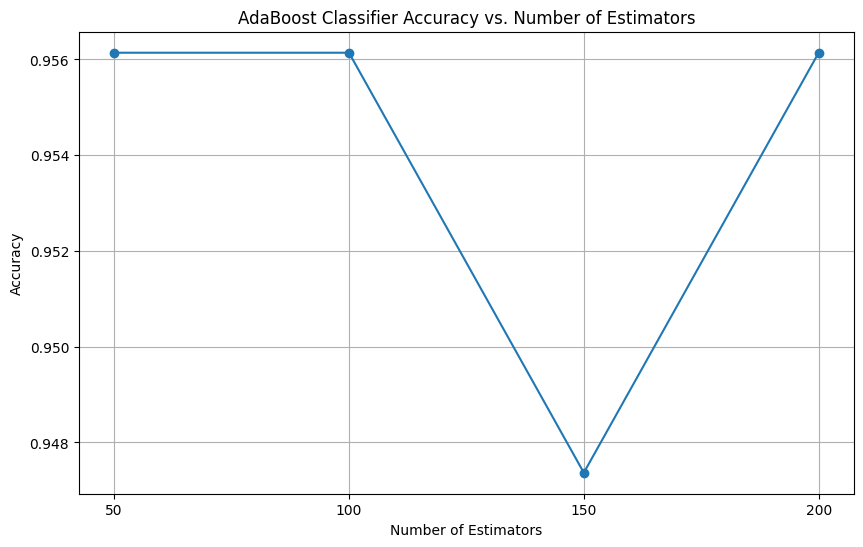

In [ ]:
#25.  Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


n_estimators_list = [50, 100, 150, 200]
accuracies = []
for n_estimators in n_estimators_list:
    adaboost_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=2)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"AdaBoost Classifier with {n_estimators} estimators - Accuracy: {accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

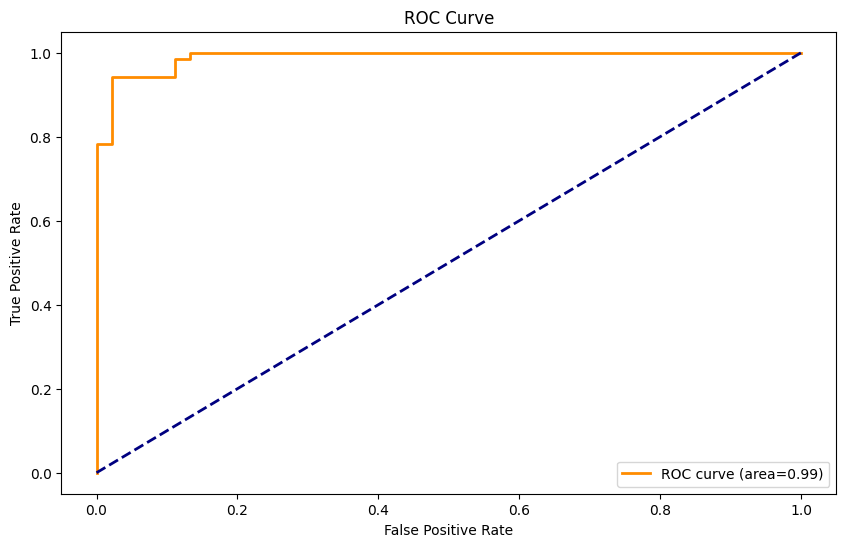

In [ ]:
#26. Train a Gradient Boosting Classifier and visualize the ROC curve

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X,y=load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

y_pred_proba=gb_model.predict_proba(X_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (area={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




In [ ]:
#27.  Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

X,y=make_regression(n_samples=1000,n_features=2, noise=10,random_state=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30,random_state=1)

regressor=XGBRegressor()
regressor

regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print("current model performance:")
print(f"R2 score: {r2_score(y_test,y_pred)}")
print(f"Mean_absolute Error:{mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred)}")

from sklearn.model_selection import GridSearchCV
param_grids={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,1.0,1.5,2.0],

}
grid_search=GridSearchCV(estimator=regressor,param_grid=param_grids,cv=5,verbose=0)

grid_search.fit(X_train,y_train)
grid_search.best_params_
y_pred_tuned=grid_search.best_estimator_.predict(X_test)
print("current model performance after tuning:")
print(f"R2 score: {r2_score(y_test,y_pred)}")
print(f"Mean_absolute Error:{mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred)}")

current model performance:
R2 score: 0.9766041606160056
Mean_absolute Error:10.46115674730029
Mean Squared Error:193.37775910652263
current model performance after tuning:
R2 score: 0.9766041606160056
Mean_absolute Error:10.46115674730029
Mean Squared Error:193.37775910652263


In [6]:
#28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           weights=[0.95], flip_y=0.01, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)


print("CatBoost Classifier without class weighting:")
catboost_model_no_weights = CatBoostClassifier(verbose=False, random_state=2)
catboost_model_no_weights.fit(X_train, y_train)
y_pred_no_weights = catboost_model_no_weights.predict(X_test)
print(classification_report(y_test, y_pred_no_weights))

print("\nCatBoost Classifier with class weighting:")
catboost_model_with_weights = CatBoostClassifier(verbose=False, random_state=2, class_weights={0: 0.75, 1: 0.25})
catboost_model_with_weights.fit(X_train, y_train)
y_pred_with_weights = catboost_model_with_weights.predict(X_test)
print(classification_report(y_test, y_pred_with_weights))

CatBoost Classifier without class weighting:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       1.00      0.73      0.84        11

    accuracy                           0.98       200
   macro avg       0.99      0.86      0.92       200
weighted avg       0.99      0.98      0.98       200


CatBoost Classifier with class weighting:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       189
           1       1.00      0.36      0.53        11

    accuracy                           0.96       200
   macro avg       0.98      0.68      0.76       200
weighted avg       0.97      0.96      0.96       200



AdaBoost Classifier with learning rate 0.01 - Accuracy: 0.9035087719298246
AdaBoost Classifier with learning rate 0.1 - Accuracy: 0.9385964912280702
AdaBoost Classifier with learning rate 0.5 - Accuracy: 0.9385964912280702
AdaBoost Classifier with learning rate 1.0 - Accuracy: 0.956140350877193
AdaBoost Classifier with learning rate 1.5 - Accuracy: 0.956140350877193
AdaBoost Classifier with learning rate 2.0 - Accuracy: 0.8947368421052632


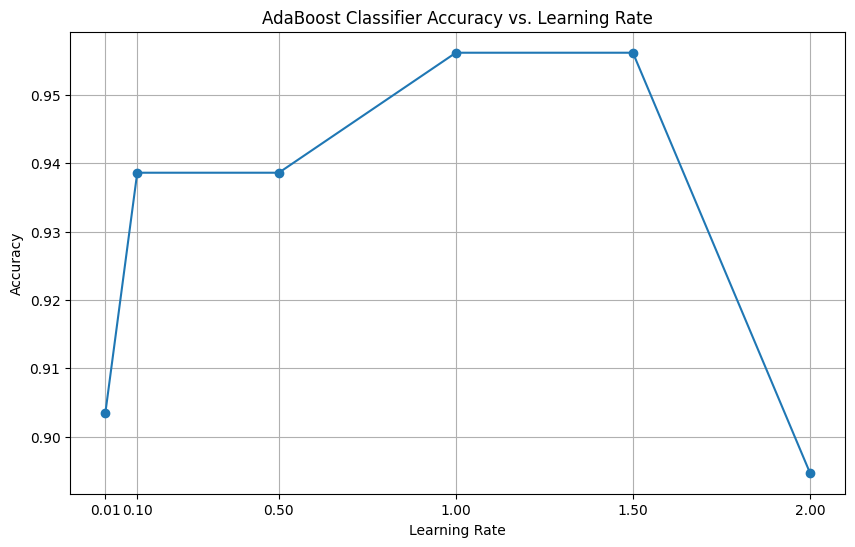

In [7]:
#29. Train an AdaBoost Classifier and analyze the effect of different learning rates

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
accuracies = []

for lr in learning_rates:
    adaboost_model = AdaBoostClassifier(learning_rate=lr, random_state=2)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"AdaBoost Classifier with learning rate {lr} - Accuracy: {accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title("AdaBoost Classifier Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xticks(learning_rates)
plt.grid(True)
plt.show()

In [10]:
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

xgb_model = XGBClassifier(objective='multi:softprob', use_label_encoder=True, eval_metric='mlogloss', random_state=2)
xgb_model.fit(X_train, y_train)

y_pred_proba = xgb_model.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_proba)
print(f"XGBoost Classifier Log-Loss: {logloss}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Log-Loss: 0.2626051142886166
